In [15]:
# Library imports.
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import numpy as np

# Local imports.
from urbansurge import swmm_model, analysis_tools, file_utils
from urbansurge.sensing import sensor_utils

# Autoupdate modules.
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load SWMM Model.

In [2]:
# Path to configuration file.
config_path = r"C:\Users\ay434\Documents\urbansurge\analysis\lab_system\lab_system_config.yml"

# Create instance of SWMM model.
swmm = swmm_model.SWMM(config_path)

# Configure model.
swmm.configure_model()

Simulation info
Flow Units: CFS
System Units: US
Start Time: 2020-01-01 00:00:00
Start Time: 2020-01-01 23:00:00


### Network geometry

In [6]:
# Get link-node dict.
link_node_dict = sensor_utils.link_nodes(swmm.inp_path, int_convert=True)

# Unique nodes.
start_nodes, end_nodes = zip(*link_node_dict.values())
unique_nodes = [i for i in list(set(list(start_nodes + end_nodes)))]
print(unique_nodes)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63]


In [8]:
# Generate graph.
G = nx.DiGraph()

# Add nodes.
for node in unique_nodes:
    G.add_node(node)
    
# Add edges.
for edge, nodes in link_node_dict.items():
    G.add_edge(*nodes)

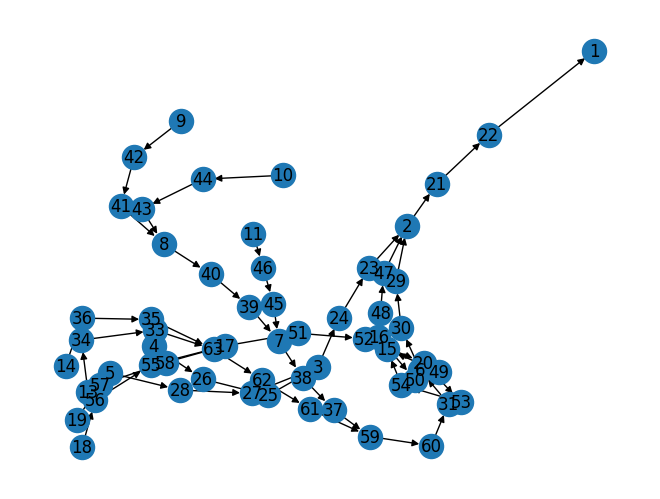

In [29]:
nx.draw(G, with_labels=True)
plt.show()